<h2>Import libraries

In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import os
import urllib.request
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) 

<h2>Import team logo and description info

In [2]:
logos = nfl.import_team_desc()
logos.head()

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


<h2>Subset for necessary columns only

In [3]:
logos = logos[['team_name', 'team_abbr', 'team_logo_espn']]
display(logos.head())

,team_name,team_abbr,team_logo_espn
0,Arizona Cardinals,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,Atlanta Falcons,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,Baltimore Ravens,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,Buffalo Bills,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,Carolina Panthers,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


<h2>Initialize lists and create folder for logos

In [4]:
#Initialize empty list for logo path
logo_paths = []

#Initialize empty list for the team names and abbreviations
team_name = []
team_abbr = []

#Create folder for logo files if not already exists
if not os.path.exists("logo"):
    os.makedirs("logo")

<h2>Pull team logos from URL, save them in logo folder, and save file paths.

In [5]:
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logo/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logo/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])
    team_name.append(logos['team_name'][team])

<h2>Create dictionary for team name, team abbr, and logo path; then create dataframe from dictionary

In [6]:
#Create dictionary for team name, team abbr, and log path
team_info = {'Team': team_name, 'Team Abbr' : team_abbr, 'Logo Path' : logo_paths}
#Create dataframe from dictionary
logo_df = pd.DataFrame(team_info)
logo_df.head()

,Team,Team Abbr,Logo Path
0,Arizona Cardinals,ARI,logo/ARI.tif
1,Atlanta Falcons,ATL,logo/ATL.tif
2,Baltimore Ravens,BAL,logo/BAL.tif
3,Buffalo Bills,BUF,logo/BUF.tif
4,Carolina Panthers,CAR,logo/CAR.tif


<h2>Import data from Pro Football Reference and create dataframe

In [7]:
url_def = "https://www.pro-football-reference.com/years/2023/opp.htm"
defense_df = pd.read_html(url_def)
defense_df = defense_df[0]
display(defense_df)

Unnamed: 0_level_0     Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk                     Tm                  G   
0                 1.0       Baltimore Ravens               14.0   
1                 2.0    San Francisco 49ers               14.0   
2                 3.0     Kansas City Chiefs               14.0   
3                 4.0          Buffalo Bills               14.0   
4                 5.0         Dallas Cowboys               14.0   
5                 6.0     New Orleans Saints               14.0   
6                 7.0      Minnesota Vikings               14.0   
7                 8.0        Atlanta Falcons               14.0   
8                 9.0      Las Vegas Raiders               14.0   
9                10.0    Pittsburgh Steelers               14.0   
10               11.0          New York Jets               14.0   
11               12.0       Cleveland Browns               14.0   
12               13.0   Tampa Bay Buccaneers               14.0   
13               14.0         Miami Dolphins               14.0   
14               15.0         Houston Texans               14.0   
15               16.0   New England Patriots               14.0   
16               17.0      Green Bay Packers               14.0   
17               18.0       Tennessee Titans               14.0   
18               19.0       Los Angeles Rams               14.0   
19               20.0     Cincinnati Bengals               14.0   
20               21.0   Jacksonville Jaguars               14.0   
21               22.0          Chicago Bears               14.0   
22               23.0          Detroit Lions               14.0   
23               24.0       Seattle Seahawks               14.0   
24               25.0        New York Giants               14.0   
25               26.0    Philadelphia Eagles               14.0   
26               27.0     Indianapolis Colts               14.0   
27               28.0   Los Angeles Chargers               14.0   
28               29.0      Carolina Panthers               14.0   
29               30.0         Denver Broncos               14.0   
30               31.0      Arizona Cardinals               14.0   
31               32.0  Washington Commanders               14.0   
32                NaN               Avg Team                NaN   
33                NaN           League Total                NaN   
34                NaN               Avg Tm/G                NaN   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Tot Yds & TO              \
                   PA                Yds          Ply  Y/P     TO   
0               225.0             4030.0        913.0  4.4   21.0   
1               234.0             4341.0        870.0  5.0   25.0   
2               245.0             4105.0        842.0  4.9   16.0   
3               254.0             4380.0        849.0  5.2   24.0   
4               264.0             4120.0        834.0  4.9   21.0   
5               267.0             4366.0        877.0  5.0   22.0   
6               269.0             4424.0        889.0  5.0   20.0   
7               278.0             4364.0        884.0  4.9   15.0   
8               280.0             4682.0        903.0  5.2   19.0   
9               280.0             4855.0        907.0  5.4   21.0   
10              287.0             4177.0        913.0  4.6   19.0   
11              289.0             3655.0        807.0  4.5   23.0   
12              290.0             5038.0        900.0  5.6   20.0   
13              294.0             4108.0        864.0  4.8   22.0   
14              295.0             4657.0        889.0  5.2   20.0   
15              299.0             4316.0        895.0  4.8   14.0   
16              301.0             4899.0        900.0  5.4   16.0   
17              301.0             4750.0        910.0  5.2   12.0   
18              310.0             4716.0        895.0  5.3   12.0   
19              311.0             5354.0        891.0  6.0   23.0   
20   

<h2>Drop 1st level of multi-level index

In [8]:
defense_df.columns = defense_df.columns.droplevel(0)
display(defense_df)

,Rk,Tm,G,PA,Yds,Ply,Y/P,TO,FL,1stD,...,Yds,TD,Y/A,1stD,Pen,Yds,1stPy,Sc%,TO%,EXP
0,1.0,Baltimore Ravens,14.0,225.0,4030.0,913.0,4.4,21.0,10.0,249.0,...,1430.0,4.0,4.3,77.0,87.0,677.0,32.0,28.8,11.3,85.81
1,2.0,San Francisco 49ers,14.0,234.0,4341.0,870.0,5.0,25.0,6.0,265.0,...,1252.0,8.0,4.3,81.0,81.0,647.0,25.0,32.6,16.7,32.57
2,3.0,Kansas City Chiefs,14.0,245.0,4105.0,842.0,4.9,16.0,8.0,246.0,...,1546.0,9.0,4.5,84.0,65.0,559.0,19.0,28.4,10.8,21.04
3,4.0,Buffalo Bills,14.0,254.0,4380.0,849.0,5.2,24.0,11.0,263.0,...,1571.0,10.0,4.6,78.0,87.0,675.0,29.0,32.4,15.5,3.19
4,5.0,Dallas Cowboys,14.0,264.0,4120.0,834.0,4.9,21.0,8.0,256.0,...,1644.0,13.0,4.3,94.0,89.0,827.0,35.0,30.4,14.2,27.85
5,6.0,New Orleans Saints,14.0,267.0,4366.0,877.0,5.0,22.0,8.0,250.0,...,1770.0,9.0,4.5,92.0,86.0,637.0,30.0,31.7,13.0,37.68
6,7.0,Minnesota Vikings,14.0,269.0,4424.0,889.0,5.0,20.0,9.0,253.0,...,1288.0,8.0,3.7,81.0,94.0,812.0,10.0,34.4,13.0,18.17
7,8.0,Atlanta Falcons,14.0,278.0,4364.0,884.0,4.9,15.0,8.0,251.0,...,1571.0,5.0,3.9,79.0,92.0,732.0,28.0,35.8,9.4,32.79
8,9.0,Las Vegas Raiders,14.0,280.0,4682.0,903.0,5.2,19.0,8.0,278.0,...,1748.0,12.0,4.3,98.0,82.0,730.0,23.0,33.8,11.7,-21.51
9,10.0,Pittsburgh Steelers,14.0,280.0,4855.0,907.0,5.4,21.0,8.0,264.0,...,1703.0,8.0,4.3,84.0,80.0,670.0,29.0,34.8,13.3,0.35


<h2>Subset for necessary columns only

In [9]:
defense_df = defense_df[["Tm","G","PA","Yds"]]
display(defense_df)

,Tm,G,PA,Yds,Yds,Yds,Yds
0,Baltimore Ravens,14.0,225.0,4030.0,2600.0,1430.0,677.0
1,San Francisco 49ers,14.0,234.0,4341.0,3089.0,1252.0,647.0
2,Kansas City Chiefs,14.0,245.0,4105.0,2559.0,1546.0,559.0
3,Buffalo Bills,14.0,254.0,4380.0,2809.0,1571.0,675.0
4,Dallas Cowboys,14.0,264.0,4120.0,2476.0,1644.0,827.0
5,New Orleans Saints,14.0,267.0,4366.0,2596.0,1770.0,637.0
6,Minnesota Vikings,14.0,269.0,4424.0,3136.0,1288.0,812.0
7,Atlanta Falcons,14.0,278.0,4364.0,2793.0,1571.0,732.0
8,Las Vegas Raiders,14.0,280.0,4682.0,2934.0,1748.0,730.0
9,Pittsburgh Steelers,14.0,280.0,4855.0,3152.0,1703.0,670.0


<h2>Rename "Yds" columns appropriately due to duplicate names for different stats

In [10]:
defense_df.columns = ["Team", "G", "PA", "YA", "PassY_Allowed", "RushY_Allowed", "PenaltyY"]
display(defense_df)

,Team,G,PA,YA,PassY_Allowed,RushY_Allowed,PenaltyY
0,Baltimore Ravens,14.0,225.0,4030.0,2600.0,1430.0,677.0
1,San Francisco 49ers,14.0,234.0,4341.0,3089.0,1252.0,647.0
2,Kansas City Chiefs,14.0,245.0,4105.0,2559.0,1546.0,559.0
3,Buffalo Bills,14.0,254.0,4380.0,2809.0,1571.0,675.0
4,Dallas Cowboys,14.0,264.0,4120.0,2476.0,1644.0,827.0
5,New Orleans Saints,14.0,267.0,4366.0,2596.0,1770.0,637.0
6,Minnesota Vikings,14.0,269.0,4424.0,3136.0,1288.0,812.0
7,Atlanta Falcons,14.0,278.0,4364.0,2793.0,1571.0,732.0
8,Las Vegas Raiders,14.0,280.0,4682.0,2934.0,1748.0,730.0
9,Pittsburgh Steelers,14.0,280.0,4855.0,3152.0,1703.0,670.0


<h2>Add "Season" column

In [11]:
defense_df["Season"] = 2023
display(defense_df.head())

,Team,G,PA,YA,PassY_Allowed,RushY_Allowed,PenaltyY,Season
0,Baltimore Ravens,14.0,225.0,4030.0,2600.0,1430.0,677.0,2023
1,San Francisco 49ers,14.0,234.0,4341.0,3089.0,1252.0,647.0,2023
2,Kansas City Chiefs,14.0,245.0,4105.0,2559.0,1546.0,559.0,2023
3,Buffalo Bills,14.0,254.0,4380.0,2809.0,1571.0,675.0,2023
4,Dallas Cowboys,14.0,264.0,4120.0,2476.0,1644.0,827.0,2023


<h2>Drop NA columns

In [12]:
defense_df = defense_df.dropna()
display(defense_df)

,Team,G,PA,YA,PassY_Allowed,RushY_Allowed,PenaltyY,Season
0,Baltimore Ravens,14.0,225.0,4030.0,2600.0,1430.0,677.0,2023
1,San Francisco 49ers,14.0,234.0,4341.0,3089.0,1252.0,647.0,2023
2,Kansas City Chiefs,14.0,245.0,4105.0,2559.0,1546.0,559.0,2023
3,Buffalo Bills,14.0,254.0,4380.0,2809.0,1571.0,675.0,2023
4,Dallas Cowboys,14.0,264.0,4120.0,2476.0,1644.0,827.0,2023
5,New Orleans Saints,14.0,267.0,4366.0,2596.0,1770.0,637.0,2023
6,Minnesota Vikings,14.0,269.0,4424.0,3136.0,1288.0,812.0,2023
7,Atlanta Falcons,14.0,278.0,4364.0,2793.0,1571.0,732.0,2023
8,Las Vegas Raiders,14.0,280.0,4682.0,2934.0,1748.0,730.0,2023
9,Pittsburgh Steelers,14.0,280.0,4855.0,3152.0,1703.0,670.0,2023


<h2>Validate NA rows have been removed

In [13]:
display(defense_df.isna().sum())

Team             0
G                0
PA               0
YA               0
PassY_Allowed    0
RushY_Allowed    0
PenaltyY         0
Season           0
dtype: int64

<h2>Subset dataset again for necessary columns

In [14]:
defense_df = defense_df[["Season","Team","G","PA","YA"]]
display(defense_df.head())

,Season,Team,G,PA,YA
0,2023,Baltimore Ravens,14.0,225.0,4030.0
1,2023,San Francisco 49ers,14.0,234.0,4341.0
2,2023,Kansas City Chiefs,14.0,245.0,4105.0
3,2023,Buffalo Bills,14.0,254.0,4380.0
4,2023,Dallas Cowboys,14.0,264.0,4120.0


<h2>Look at data types to ensure they are proper to use in calculations

In [15]:
defense_df.dtypes

Season      int64
Team       object
G         float64
PA        float64
YA        float64
dtype: object

<h2>Create new columns "PA/G" (Points Allowed Per Game) and "YA/G" (Yards Allowed Per Game)

In [16]:
defense_df["PA/G"] = round(defense_df["PA"] / defense_df["G"],1)
defense_df["YA/G"] = round(defense_df["YA"] / defense_df["G"],1)
display(defense_df.head())

,Season,Team,G,PA,YA,PA/G,YA/G
0,2023,Baltimore Ravens,14.0,225.0,4030.0,16.1,287.9
1,2023,San Francisco 49ers,14.0,234.0,4341.0,16.7,310.1
2,2023,Kansas City Chiefs,14.0,245.0,4105.0,17.5,293.2
3,2023,Buffalo Bills,14.0,254.0,4380.0,18.1,312.9
4,2023,Dallas Cowboys,14.0,264.0,4120.0,18.9,294.3


<h2>Create new dataframe that merges defensive stats with logo dataframe; will automatically merge on "Team" since that's the common column in both dataframes

In [17]:
defense_df = pd.merge(defense_df, logo_df)
display(defense_df)

,Season,Team,G,PA,YA,PA/G,YA/G,Team Abbr,Logo Path
0,2023,Baltimore Ravens,14.0,225.0,4030.0,16.1,287.9,BAL,logo/BAL.tif
1,2023,San Francisco 49ers,14.0,234.0,4341.0,16.7,310.1,SF,logo/SF.tif
2,2023,Kansas City Chiefs,14.0,245.0,4105.0,17.5,293.2,KC,logo/KC.tif
3,2023,Buffalo Bills,14.0,254.0,4380.0,18.1,312.9,BUF,logo/BUF.tif
4,2023,Dallas Cowboys,14.0,264.0,4120.0,18.9,294.3,DAL,logo/DAL.tif
5,2023,New Orleans Saints,14.0,267.0,4366.0,19.1,311.9,NO,logo/NO.tif
6,2023,Minnesota Vikings,14.0,269.0,4424.0,19.2,316.0,MIN,logo/MIN.tif
7,2023,Atlanta Falcons,14.0,278.0,4364.0,19.9,311.7,ATL,logo/ATL.tif
8,2023,Las Vegas Raiders,14.0,280.0,4682.0,20.0,334.4,LV,logo/LV.tif
9,2023,Pittsburgh Steelers,14.0,280.0,4855.0,20.0,346.8,PIT,logo/PIT.tif


<h2>Create final dataframe that includes only necessary columns

In [18]:
defense_final = defense_df[["Team Abbr", "PA/G", "YA/G", "Logo Path"]]
display(defense_final.head())

,Team Abbr,PA/G,YA/G,Logo Path
0,BAL,16.1,287.9,logo/BAL.tif
1,SF,16.7,310.1,logo/SF.tif
2,KC,17.5,293.2,logo/KC.tif
3,BUF,18.1,312.9,logo/BUF.tif
4,DAL,18.9,294.3,logo/DAL.tif


<h2>Create function for retrieving image path and loading it into visual

In [19]:
def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

<h2>Get min and max for the two stats that will be used in the visual to set the appropriate range of the axes

In [20]:
print("Minimum PA/G: ", np.min(defense_final["PA/G"]))
print("Maximum PA/G: ", np.max(defense_final["PA/G"]))
print("Minimum YA/G: ", np.min(defense_final["YA/G"]))
print("Maximum YA/G: ", np.max(defense_final["YA/G"]))

Minimum PA/G:  16.1
Maximum PA/G:  30.2
Minimum YA/G:  261.1
Maximum YA/G:  384.5


<h2>Create visual

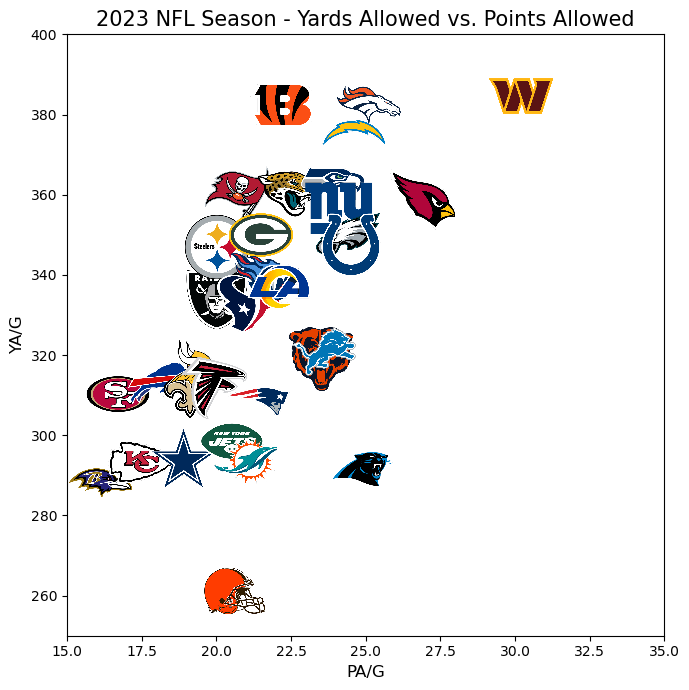

In [21]:
#Define plot size and autolayout setting
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

#Define x and y variables
x = defense_final["PA/G"]
y = defense_final["YA/G"]

#Define image paths
paths = defense_final['Logo Path']

#Define plot
fig, ax = plt.subplots()

#Load data into plot
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

#Set plot parameters
plt.xlim(15, 35);
plt.ylim(250, 400);
plt.title("2023 NFL Season - Yards Allowed vs. Points Allowed", fontdict={'fontsize':15});
plt.xlabel("PA/G", fontdict={'fontsize':12});
plt.ylabel("YA/G", fontdict={'fontsize':12});

<h2>Add new columns "PA/G_RANK" and "YA/G_RANK" to final dataframe to provide ranking for each team; validate that logos align with rankings

In [22]:
defense_final["PA/G_RANK"] = defense_final["PA/G"].rank(method='first', ascending=True).astype(int)
defense_final["YA/G_RANK"] = defense_final["YA/G"].rank(method='first', ascending=True).astype(int)
display(defense_final.sort_values("PA/G_RANK"))

,Team Abbr,PA/G,YA/G,Logo Path,PA/G_RANK,YA/G_RANK
0,BAL,16.1,287.9,logo/BAL.tif,1,2
1,SF,16.7,310.1,logo/SF.tif,2,9
2,KC,17.5,293.2,logo/KC.tif,3,4
3,BUF,18.1,312.9,logo/BUF.tif,4,12
4,DAL,18.9,294.3,logo/DAL.tif,5,6
5,NO,19.1,311.9,logo/NO.tif,6,11
6,MIN,19.2,316.0,logo/MIN.tif,7,13
7,ATL,19.9,311.7,logo/ATL.tif,8,10
8,LV,20.0,334.4,logo/LV.tif,9,17
9,PIT,20.0,346.8,logo/PIT.tif,10,21


<h2>Interesting findings: <br>
<h2>49ers rank 2nd in points, but only 9th in yards <br>
<h2>Bills rank 4th in points, but only 12th in yards <br>
<h2>Steelers rank 10th in points, but only 21st in yards <br>
<h2>Browns rank 1st in yards, but only 12th in points <br>
<h2>Panthers rank 3rd in yards, but only 30th in points
 